I also included the examples they did for the ethane; my work on the problems they did is further down and interspersed within their demonstrations.

In [1]:
import mdtraj as md

traj = md.load('ethane_sim.dcd', top='ethane.pdb')

In [2]:
import nglview as ngl

visualize = ngl.show_mdtraj(traj)
visualize

NGLWidget(max_frame=99999)

In [3]:
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,ETH,0,
1,2,H11,H,1,ETH,0,
2,3,H12,H,1,ETH,0,
3,4,H13,H,1,ETH,0,
4,5,C2,C,1,ETH,0,
5,6,H21,H,1,ETH,0,
6,7,H22,H,1,ETH,0,
7,8,H23,H,1,ETH,0,


In [4]:
bond_indices = [0, 4] # atoms to define the bond length
bond_length = md.compute_distances(traj, [bond_indices])

In [5]:
import matplotlib.pyplot as plt

bondcounts, binedges, otherstuff = plt.hist(bond_length, bins=120)
plt.title('C-C bond length histogram')
plt.xlabel('Bond length (nm)')
plt.ylabel('Counts')
plt.show()

<Figure size 640x480 with 1 Axes>

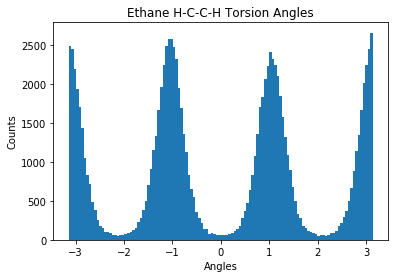

In [6]:
verticies = [5, 4, 0, 1]
bond_torsions = md.compute_dihedrals(traj, [verticies])

angle_sums, binsides, otherthings = plt.hist(bond_torsions, bins=120)
plt.title('Ethane H-C-C-H Torsion Angles')
plt.xlabel('Angles')
plt.ylabel('Counts')
plt.show()

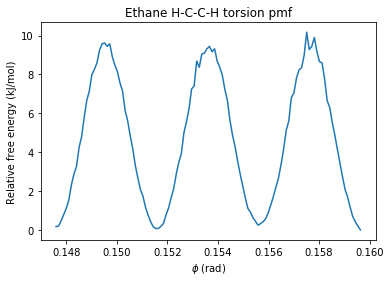

In [7]:
# they forgot to import this in the tutorial, so I added it.
import numpy as np

kB = 8.31446/1000 # Boltzmann constant in kJ/mol
Temp = 298.15 # simulation temperature
angle_sums[angle_sums==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(angle_sums) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

bincenters = (binedges[1:] + binedges[:-1])/2 # compute centers of histogram bins

plt.plot(bincenters, pmf)
plt.title('Ethane H-C-C-H torsion pmf')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()

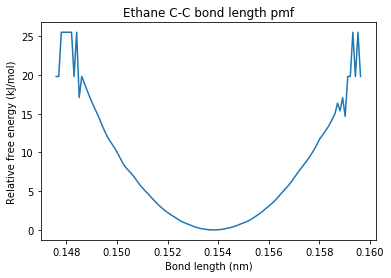

In [8]:
#They also forgot to add this too...
from scipy.misc import factorial
import statsmodels.api as sm

bondcounts[bondcounts==0] = 0.1
pmf = -kB*Temp*np.log(bondcounts)
pmf = pmf - np.min(pmf)

bincenters = (binedges[1:] + binedges[:-1])/2

pmf_smoothed = sm.nonparametric.lowess(pmf, bincenters, frac=0.05)
pmf_s = pmf_smoothed[:,1] - np.min(pmf_smoothed[:,1])

plt.plot(bincenters, pmf_s)
plt.xlabel('Bond length (nm)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.title('Ethane C-C bond length pmf')
plt.show()


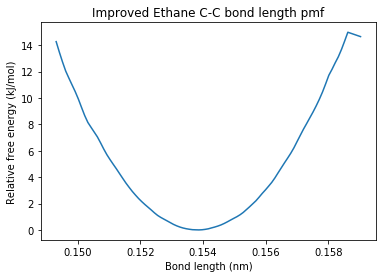

In [9]:
plt.plot(bincenters[pmf_s < 15], pmf_s[pmf_s < 15])
plt.xlabel('Bond length (nm)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.title('Improved Ethane C-C bond length pmf')
plt.show()

In [10]:
traj = md.load('butane_sim.dcd', top='butane.pdb')

In [11]:
visualize = ngl.show_mdtraj(traj)
visualize

NGLWidget(max_frame=199999)

In [12]:
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


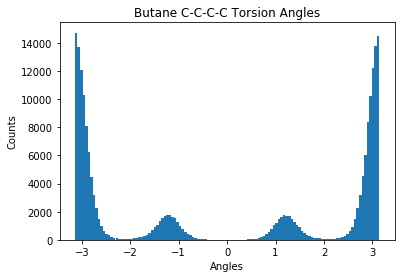

In [13]:
verticies = [10, 7, 4, 0]
bond_torsions = md.compute_dihedrals(traj, [verticies])

angle_sums, binsides, otherthings = plt.hist(bond_torsions, bins=120)
plt.title('Butane C-C-C-C Torsion Angles')
plt.xlabel('Angles')
plt.ylabel('Counts')
plt.show()

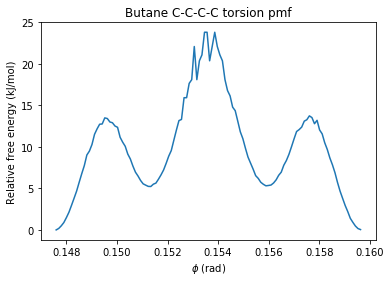

In [14]:
# they forgot to import this in the tutorial, so I added it.
kB = 8.31446/1000 # Boltzmann constant in kJ/mol
Temp = 298.15 # simulation temperature
angle_sums[angle_sums==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(angle_sums) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

bincenters = (binedges[1:] + binedges[:-1])/2 # compute centers of histogram bins

plt.plot(bincenters, pmf)
plt.title('Butane C-C-C-C torsion pmf')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()

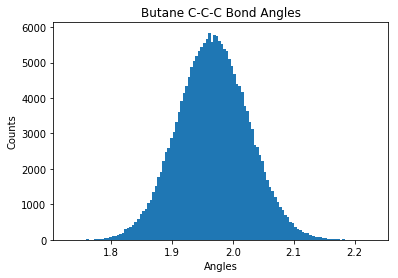

In [15]:
verticies = [10, 7, 4]
bond_angles = md.compute_angles(traj, [verticies])

angle_sums, binsides, otherthings = plt.hist(bond_angles, bins=120)
plt.title('Butane C-C-C Bond Angles')
plt.xlabel('Angles')
plt.ylabel('Counts')
plt.show()

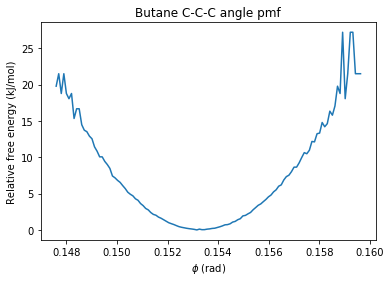

In [16]:
# they forgot to import this in the tutorial, so I added it.
kB = 8.31446/1000 # Boltzmann constant in kJ/mol
Temp = 298.15 # simulation temperature
angle_sums[angle_sums==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(angle_sums) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

bincenters = (binedges[1:] + binedges[:-1])/2 # compute centers of histogram bins

plt.plot(bincenters, pmf)
plt.title('Butane C-C-C angle pmf')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()

In [17]:
bond_indices = [0, 3] # atoms to define the bond length
bond_length = md.compute_distances(traj, [bond_indices])

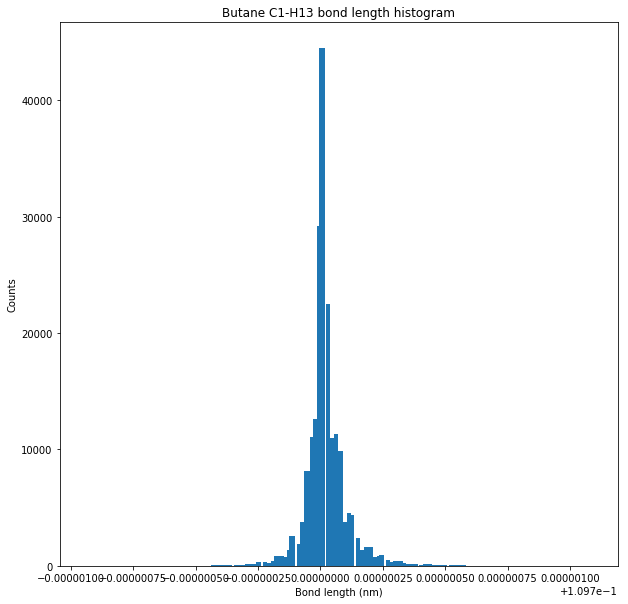

In [18]:
plt.figure(figsize=(10,10))
bondcounts, binedges, otherstuff = plt.hist(bond_length, bins=120)
plt.title('Butane C1-H13 bond length histogram')
plt.xlabel('Bond length (nm)')
plt.ylabel('Counts')
plt.show()

In [19]:
#This is very strange as the C-H bond length seems to be centered around 0.
#We know that this is defininately untrue from the visualization above.
#Apparently, this is due to an issue with an offset as disucussed on Slack.

In [20]:
bond_indices = [4, 5] # atoms to define the bond length
bond_length = md.compute_distances(traj, [bond_indices])

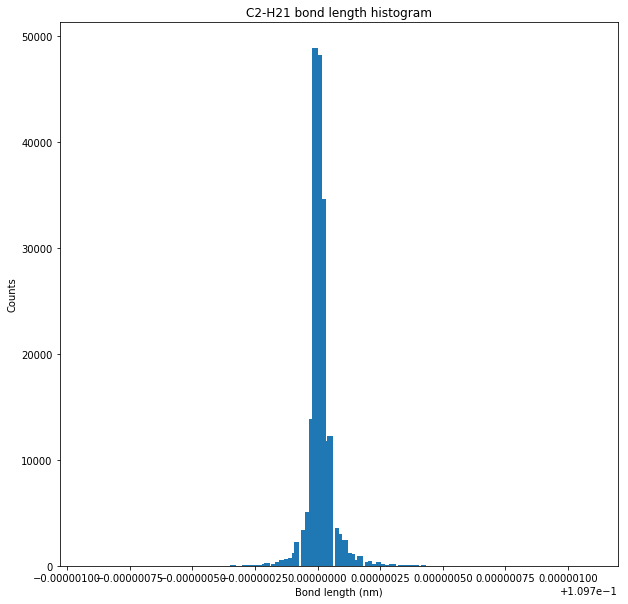

In [21]:
plt.figure(figsize=(10,10))
bondcounts, binedges, otherstuff = plt.hist(bond_length, bins=120)
plt.title('C2-H21 bond length histogram')
plt.xlabel('Bond length (nm)')
plt.ylabel('Counts')
plt.show()

In [22]:
#Again, the distance is centered around 0, even for another pair of C-H atoms.